# Care restoration (prediction)

In this notebook we use the trained CARE network to restore an image

In [1]:
from skimage.io import imread, imsave
from tnia.plotting.projections import show_xyz_slice, show_xyz_max
from csbdeep.models import Config, CARE
from skimage.transform import resize
import sys
sys.path.append('../')
import decon_helper as dh
import os

tnia available
stackview available


# Load an input image

In this cell we load an input image.  Note that the image is bigger than the patch size we trained on.  The CSBDeep framework will take care of applying the network in chunks. 

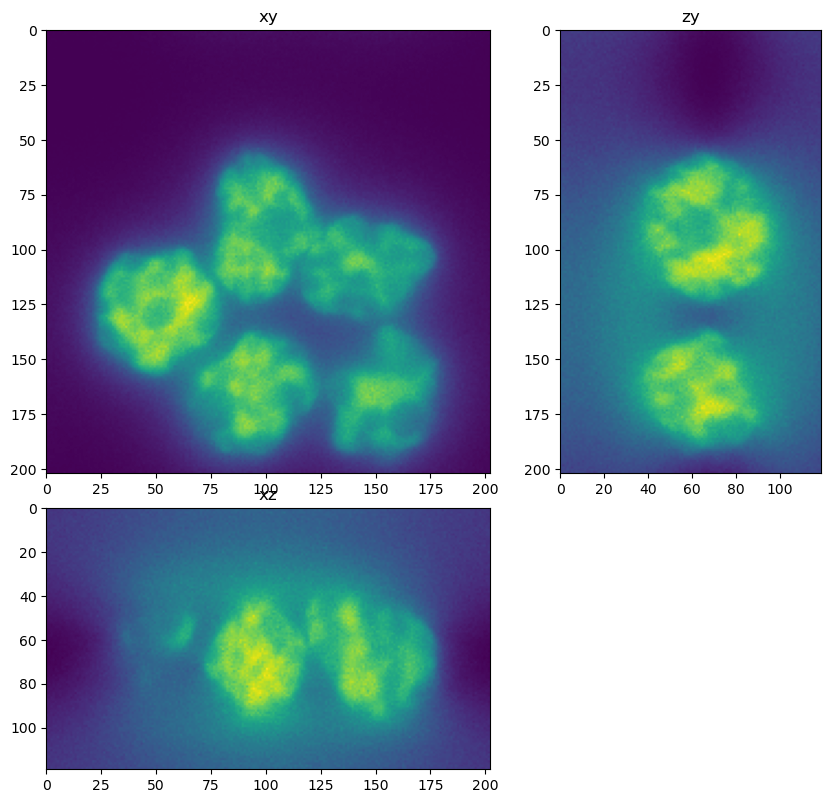

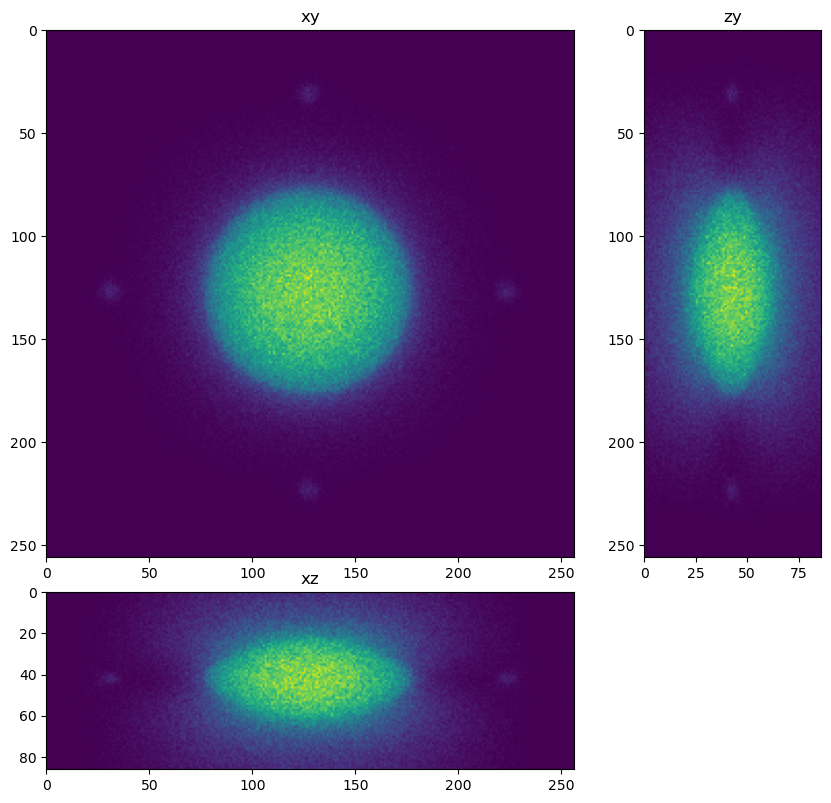

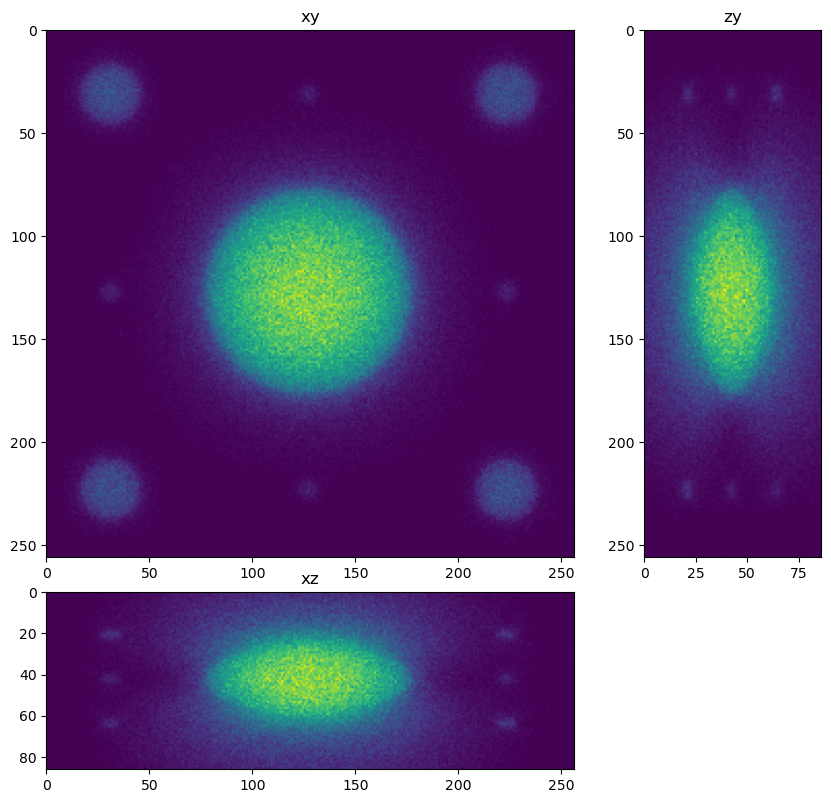

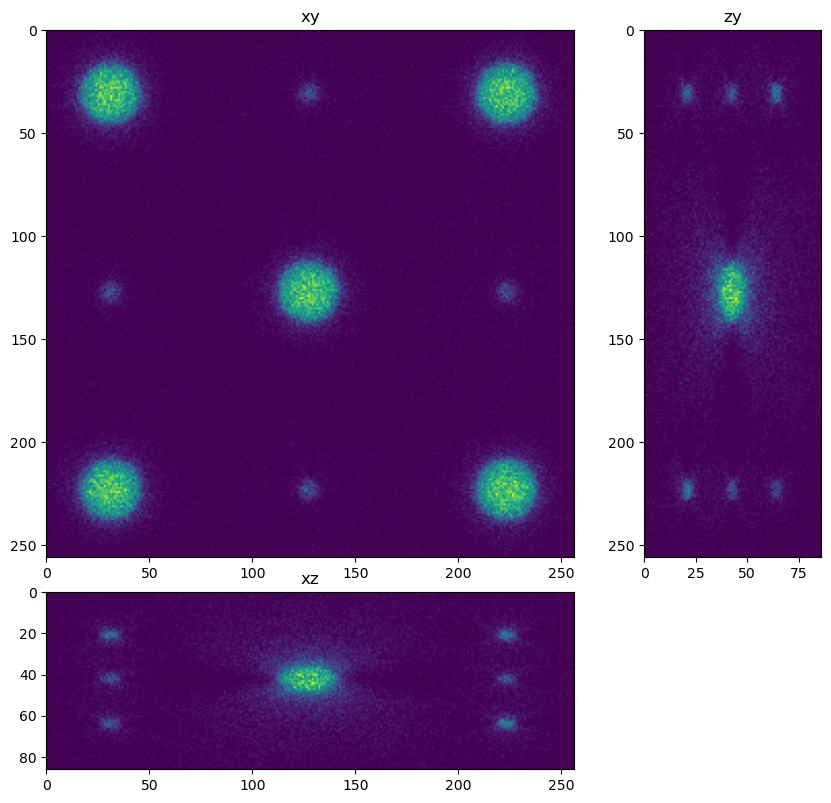

In [2]:
input_names = [r'../../data/deep learning testing/inputs/nuclei.tif',
              r'../../data/deep learning testing/inputs/spheres1.tif',
              r'../../data/deep learning testing/inputs/spheres2.tif',
              r'../../data/deep learning testing/inputs/spheres3.tif']
inputs=[]

for input_name in input_names:
    input = imread(input_name)
    nmin=input.min()
    nmax=input.max()
    input = (input.astype('float32')-nmin) / (nmax - nmin)
    inputs.append(input)
    dh.show_xyz_slice(input, 'tnia')

# Load the model

Load the model that we trained in the previous notebook

In [3]:
# load the model using the name of the model and the path to the model

#model_name = 'cytopacq_noise_high_na_high'
#model_name = 'big_small_noisy_notnoisy_model'
model_name = 'combined'

model = CARE(None, model_name, basedir='../../models')

Loading network weights from 'weights_best.h5'.


# Apply the model

In [4]:
restorations = []

for input in inputs:
    restored = model.predict(input, axes='ZYX', n_tiles=(1, 2, 2), normalizer=None)
    restorations.append(restored)

1/1 [==============================] - 1s 940ms/step


 25%|██▌       | 1/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 2/4 [00:00<00:00,  6.38it/s]

1/1 [==============================] - 0s 42ms/step


 75%|███████▌  | 3/4 [00:00<00:00,  4.36it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

1/1 [==============================] - 0s 38ms/step



 25%|██▌       | 1/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


 50%|█████     | 2/4 [00:00<00:00,  6.21it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 3/4 [00:00<00:00,  4.20it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

1/1 [==============================] - 0s 41ms/step



 25%|██▌       | 1/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


 50%|█████     | 2/4 [00:00<00:00,  5.95it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 3/4 [00:00<00:00,  4.24it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████| 4/4 [00:01<00:00,  3.95it/s]


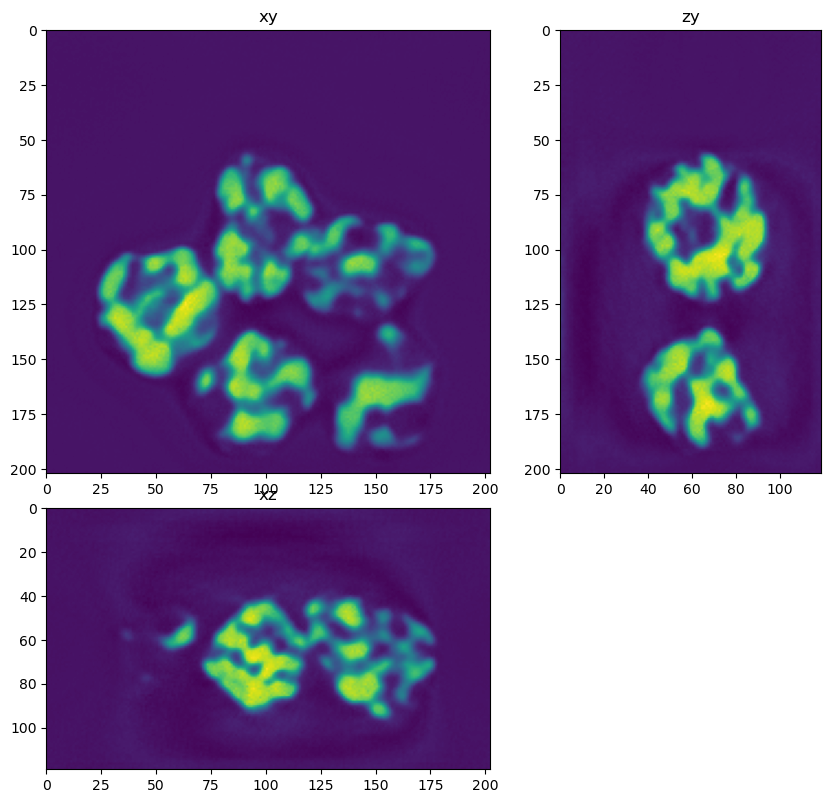

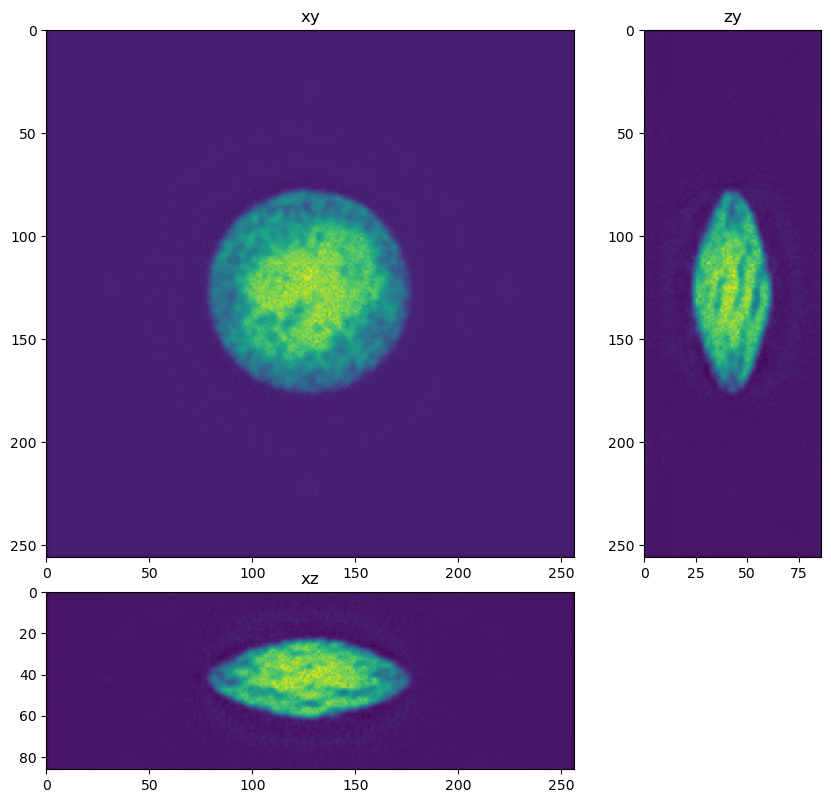

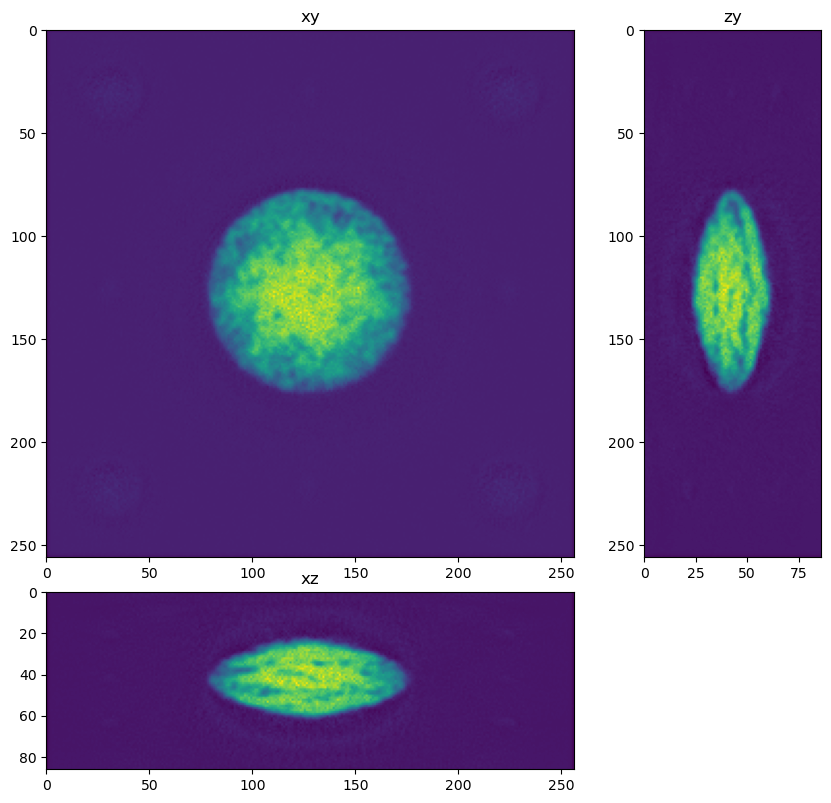

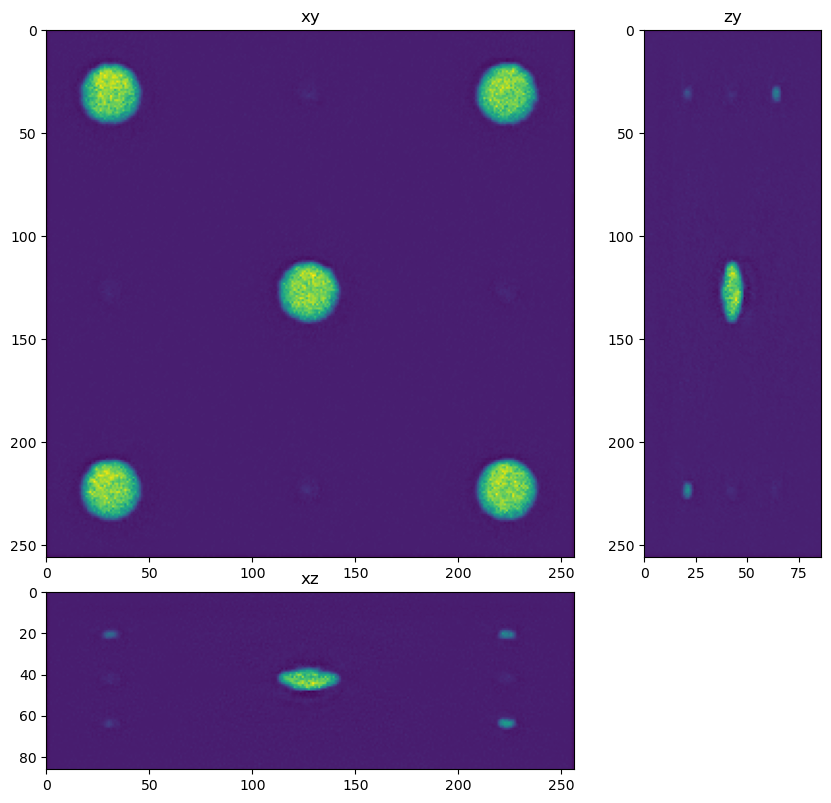

In [5]:
for restored in restorations:
    dh.show_xyz_slice(restored, 'tnia')

In [17]:
import napari
viewer = napari.Viewer()
viewer.add_image(input, name='input')
viewer.add_image(restored, name='restored')

napari.manifest -> 'napari-hello' could not be imported: Cannot find module 'napari_plugins' declared in entrypoint: 'napari_plugins:napari.yaml'


<Image layer 'restored' at 0x22c3d38c760>